# Real Estate Prices Prediction using Regression Model


### Loading the data

In [3]:
import pandas as pd
url = "https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/master/challenges/data/real_estate.csv"
real_estate_data = pd.read_csv(url)
real_estate_data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Exploring the data

In [16]:
#Describing the data
#price_per_unit --> label 

#Features that can help in predicting the price (label)
numeric_features = ['house_age', 'transit_distance', 'local_convenience_stores', 'latitude', 'longitude']

real_estate_data[numeric_features + ['price_per_unit']].describe()

,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Text(0.5, 0.98, 'Real Estate prices')

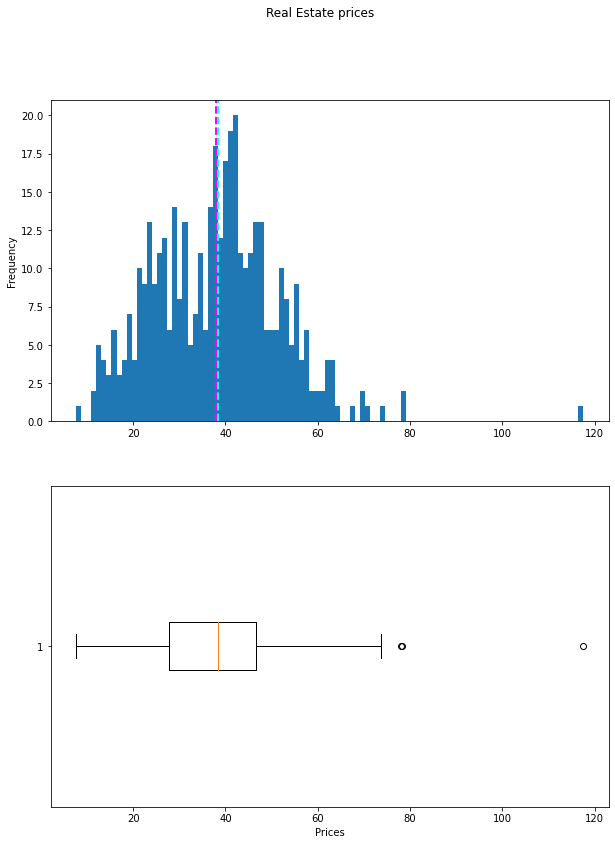

In [17]:
import matplotlib.pyplot as plt

# Inlining the plots in the notebook
%matplotlib inline 

label = real_estate_data['price_per_unit']
# Creating 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (10, 13)) #figsize ----> (height, width)

# PLotting histogram 
ax[0].hist(label, bins = 100)
ax[0].set_ylabel('Frequency')

# Lines for mean, median
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color ='cyan', linestyle ='dashed', linewidth =2)

# Plotting boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Prices')

#Title to the figure
fig.suptitle("Real Estate prices")



After looking at the plots, it is right to say that there are outliers in the dataset. So lets remove the outliers because they might distort the statistical analysis that is being carried out. 

### Removing outliers from the label 

Text(0.5, 0.98, 'Label after removing the outliers')

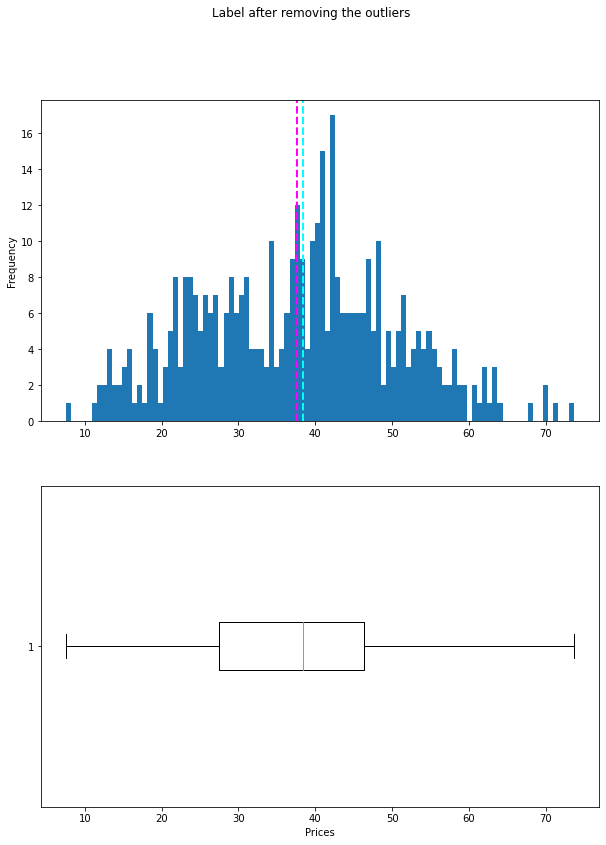

In [36]:
# using only the 
real_estate_data = real_estate_data[real_estate_data['price_per_unit']<75]

# Plotting the hist and the boxplot again
fig, ax = plt.subplots(2, 1, figsize= (10,13))

label = real_estate_data['price_per_unit']
#Plotting the histogram
ax[0].hist(label, bins = 100)
ax[0].set_ylabel('Frequency')

#PLotting the boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Prices')

# Displaying the line for mean, median on the histogram
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color ='cyan', linestyle ='dashed', linewidth =2)

# Title of the figure
fig.suptitle("Label after removing the outliers")


#### Plotting histogram for each numeric feature of the dataset

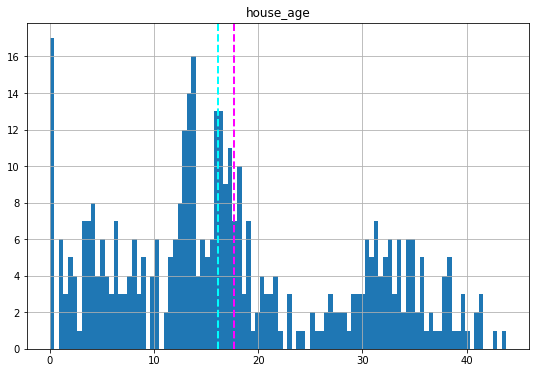

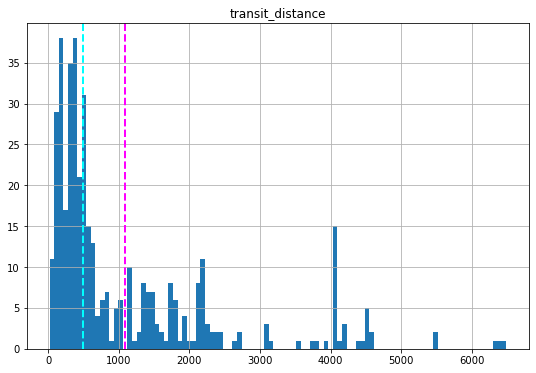

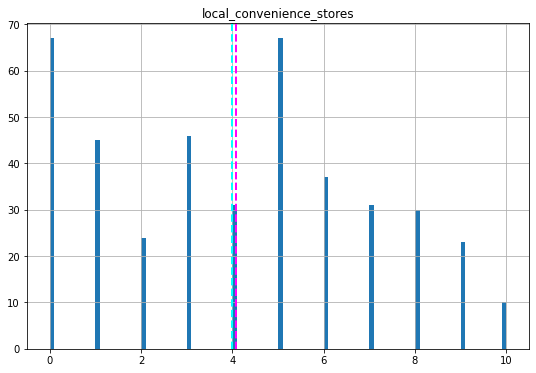

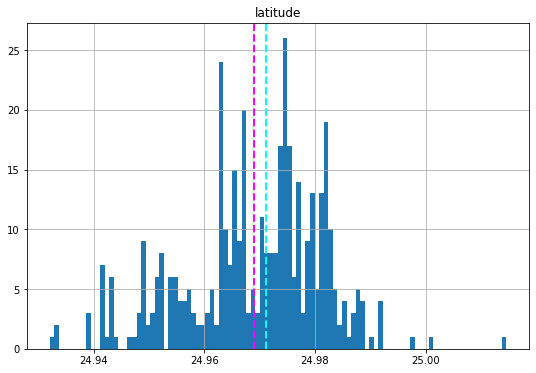

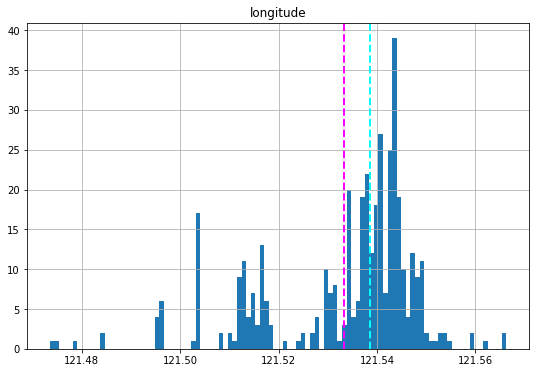

In [38]:
for feat in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = real_estate_data[feat]
    feature.hist(bins = 100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(feat)
    

#### Looking for the relationship between the features and label (prices) 

Understanding the relationship between the features and the prices using the scatter plot and by correlation

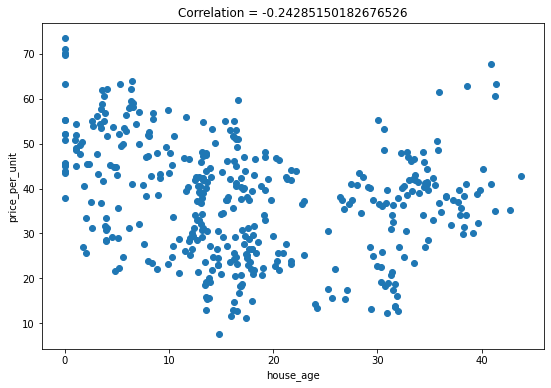

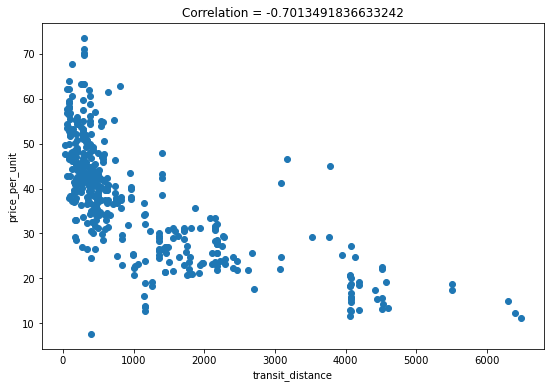

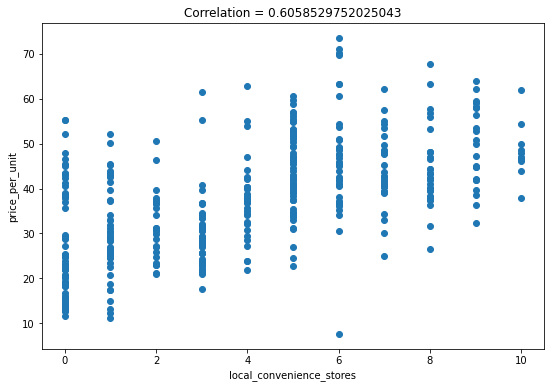

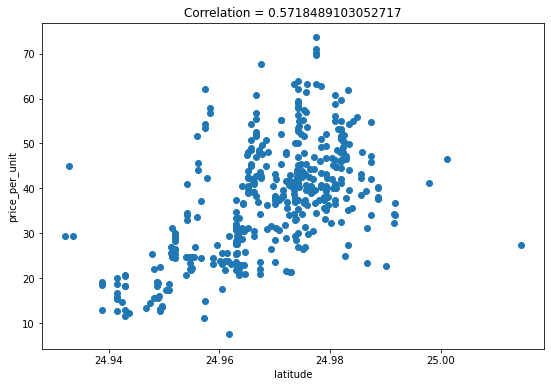

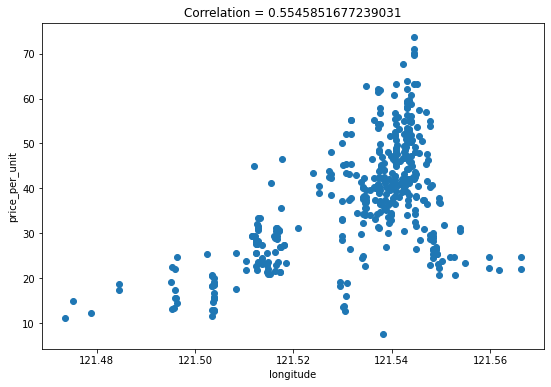

In [39]:
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = real_estate_data[col]
    label = real_estate_data['price_per_unit']
    #finding the correlation between the label the and feature
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel("price_per_unit")
    ax.set_title(f"Correlation = {correlation}") #displaying the correlation of the label and the feature on the plot
    

The relationship between the price_per_unit and house_age is negative which means they are inversly propotional to each other, so as the house gets older the price of the house decrease.

The relationship between the price_per_unit and transit_distance is negative which means they are inversly propotional to each other, so if the distance between the house and the nearest light rail station is more than the price of the house will decrease.

The relationship between the price_per_unit and longitude, latitude is positive so they are directly propotional to each other, the more longitude and latitude the more will be the price_per_unit of the house.

## Training the Regression Model

First we will seperate the features and label

In [26]:
# X will be the features data and y is going to be the label data
X, y = real_estate_data[['house_age', 'transit_distance', 'local_convenience_stores', 'latitude', 'longitude']].values, real_estate_data['price_per_unit'].values 

In [27]:
print(f"features: {X[:10]} \n label: {y[:10]}")

features: [[3.2000000e+01 8.4878820e+01 1.0000000e+01 2.4982980e+01 1.2154024e+02]
 [1.9500000e+01 3.0659470e+02 9.0000000e+00 2.4980340e+01 1.2153951e+02]
 [1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01 1.2154391e+02]
 [1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01 1.2154391e+02]
 [5.0000000e+00 3.9056840e+02 5.0000000e+00 2.4979370e+01 1.2154245e+02]
 [7.1000000e+00 2.1750300e+03 3.0000000e+00 2.4963050e+01 1.2151254e+02]
 [3.4500000e+01 6.2347310e+02 7.0000000e+00 2.4979330e+01 1.2153642e+02]
 [2.0300000e+01 2.8760250e+02 6.0000000e+00 2.4980420e+01 1.2154228e+02]
 [3.1700000e+01 5.5120380e+03 1.0000000e+00 2.4950950e+01 1.2148458e+02]
 [1.7900000e+01 1.7831800e+03 3.0000000e+00 2.4967310e+01 1.2151486e+02]] 
 label: [37.9 42.2 47.3 54.8 43.1 32.1 40.3 46.7 18.8 22.1]


###### Splitting the data into 2 subsets one is going to be used for training the model and the other is going to be used for testing and validating the model

In [28]:
from sklearn.model_selection import train_test_split

# Using the 20% of the data for testing and the remaining 80% for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
print(f"Number of rows for training: {len(X_train)} \nNumber of rows for testing: {len(X_test)}")

Number of rows for training: 331 
Number of rows for testing: 83


##### Preprocessing the data

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from